## 1. Setup and Imports


In [1]:
# Standard data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Data Loading and Overview


In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/data.csv')

# Load variable definitions for reference
var_defs = pd.read_csv('../data/raw/Xente_Variable_Definitions.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")

print("\nVariable Definitions:")
print(var_defs.to_string(index=False))


Dataset loaded successfully!
Dataset shape: (95662, 16)
Number of rows: 95,662
Number of columns: 16

Variable Definitions:
         Column Name                                                                                                        Definition
       TransactionId                                                                        Unique �transaction identifier on platform
             BatchId                                                  Unique number assigned to a batch of transactions for processing
           AccountId                                                                Unique number identifying the customer on platform
      SubscriptionId                                                               Unique number identifying the customer subscription
          CustomerId                                                                             Unique identifier attached to Account
        CurrencyCode                                              

## 3. Data Structure and Types


In [3]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\nFirst few rows:")
print(df.head())

print("\nData types distribution:")
print(df.dtypes.value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  Fraud

## 4. Missing Values Analysis


In [4]:
# Analyze missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percentage
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_df) > 0:
    print("Missing Values Analysis:")
    print(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    plt.bar(missing_df.index, missing_df['Missing_Percentage'])
    plt.title('Missing Values by Column')
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")


No missing values found in the dataset!


## 5. Summary Statistics


In [5]:
# Generate summary statistics for numerical features
print("Summary Statistics for Numerical Features:")
print(df.describe())

# Summary statistics for categorical features
print("\nSummary Statistics for Categorical Features:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head())
    print(f"Number of unique values: {df[col].nunique()}")


Summary Statistics for Numerical Features:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

Summary Statistics for Categorical Features:

TransactionId:
TransactionId
TransactionId_76871    1
TransactionId_74922    1
TransactionId_2737     1
TransactionId_28101    1
TransactionId_33267    1
Name: count, dtype: int64
Number of unique values: 956

## 6. Distribution of Numerical Features


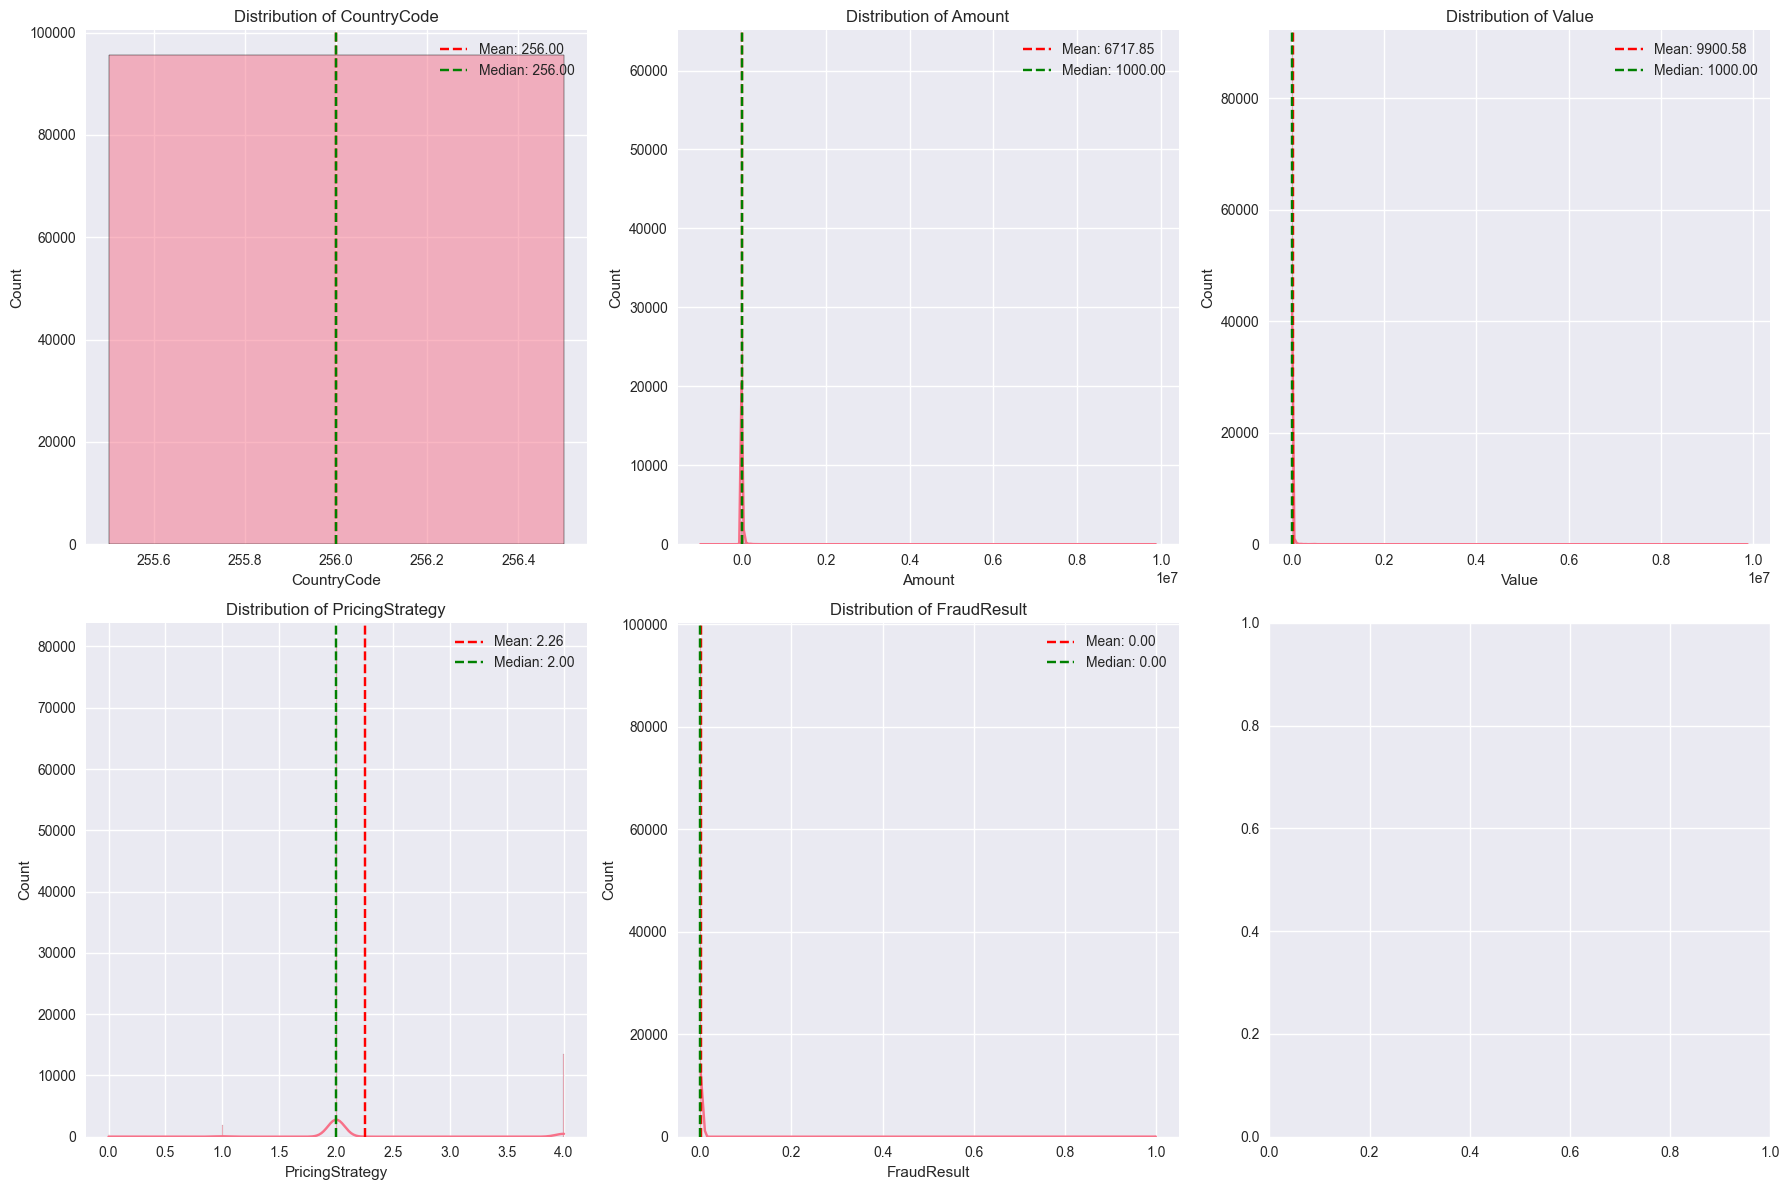

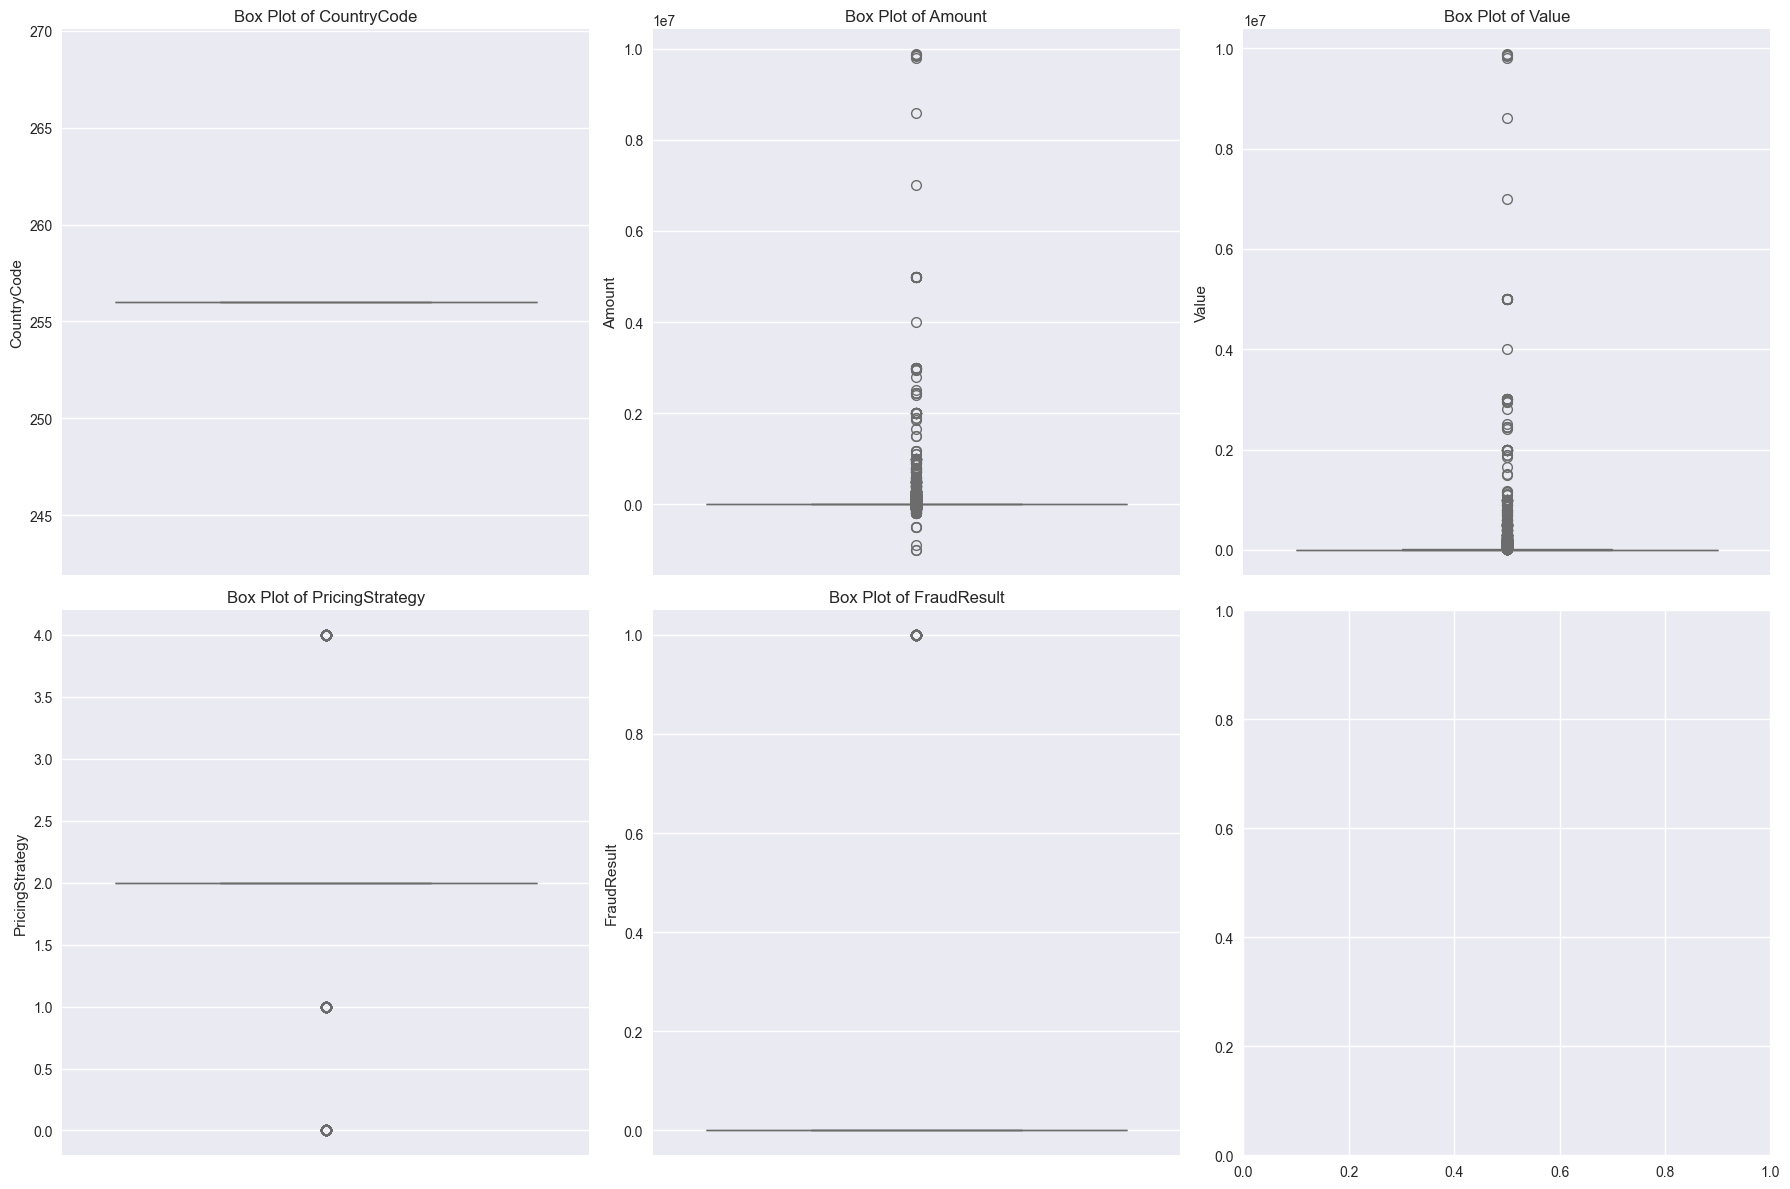

In [6]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Create distribution plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:6]):  # Plot first 6 numerical columns
    if i < len(axes):
        # Histogram
        sns.histplot(data=df, x=col, ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
        
        # Add statistics
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
        axes[i].legend()

plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:6]):
    if i < len(axes):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


## 7. Distribution of Categorical Features


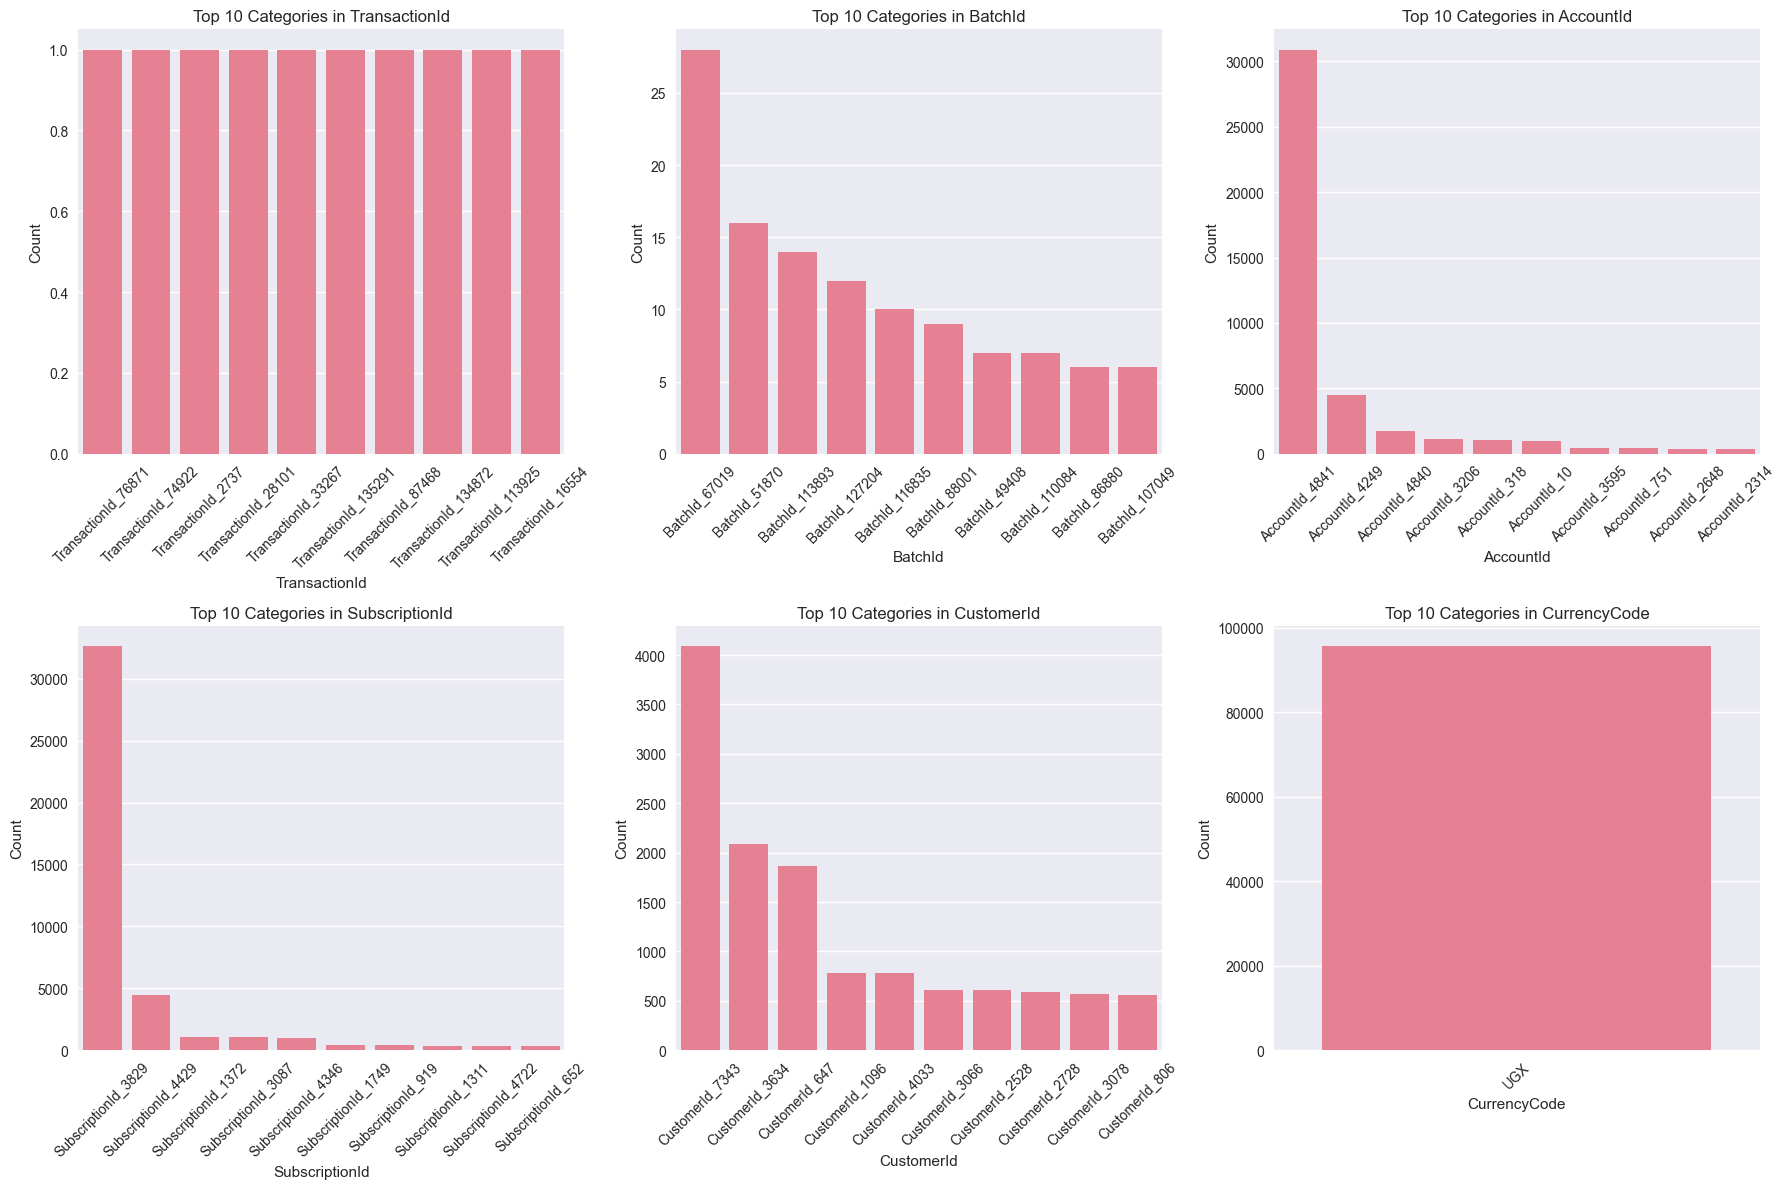


TransactionId Analysis:
Total unique values: 95662

Top 5 most common values:
TransactionId
TransactionId_76871    1
TransactionId_74922    1
TransactionId_2737     1
TransactionId_28101    1
TransactionId_33267    1
Name: count, dtype: int64

Top 5 least common values:
TransactionId
TransactionId_32860     1
TransactionId_139405    1
TransactionId_65784     1
TransactionId_8889      1
TransactionId_35670     1
Name: count, dtype: int64

BatchId Analysis:
Total unique values: 94809

Top 5 most common values:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
Name: count, dtype: int64

Top 5 least common values:
BatchId
BatchId_23939     1
BatchId_104215    1
BatchId_116411    1
BatchId_36631     1
BatchId_29317     1
Name: count, dtype: int64

AccountId Analysis:
Total unique values: 3633

Top 5 most common values:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
Acco

In [7]:
# Analyze categorical features
categorical_cols = df.select_dtypes(include=['object']).columns

# Create bar plots for categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols[:6]):
    if i < len(axes):
        value_counts = df[col].value_counts().head(10)
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
        axes[i].set_title(f'Top 10 Categories in {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print detailed statistics for each categorical column
for col in categorical_cols:
    print(f"\n{col} Analysis:")
    value_counts = df[col].value_counts()
    print(f"Total unique values: {len(value_counts)}")
    print("\nTop 5 most common values:")
    print(value_counts.head())
    print("\nTop 5 least common values:")
    print(value_counts.tail())


## 8. Correlation Analysis


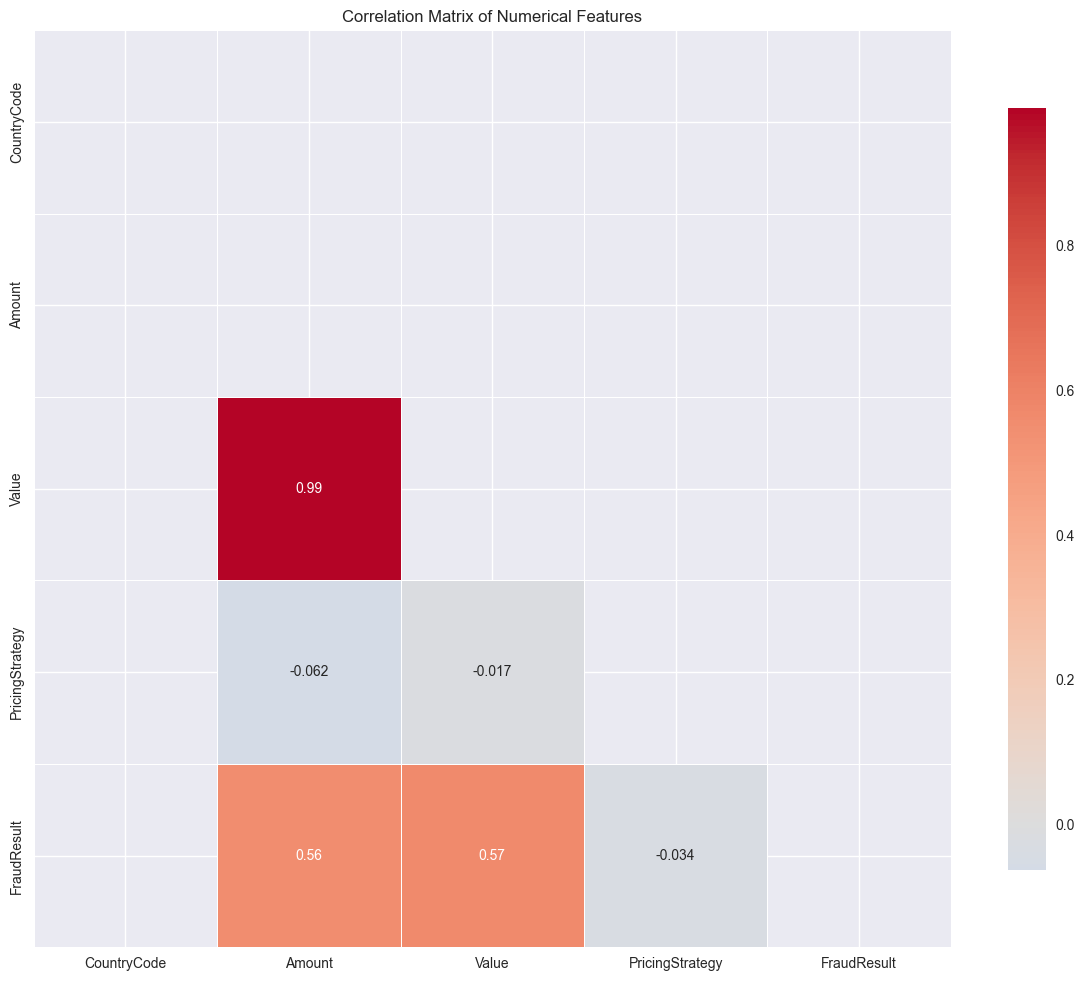

Highly correlated feature pairs (|correlation| > 0.7):
Amount - Value: 0.990


In [8]:
# Calculate correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Find highly correlated features
print("Highly correlated feature pairs (|correlation| > 0.7):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                   correlation_matrix.columns[j], 
                                   corr_value))

if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("No highly correlated features found.")


## 9. Key Insights and Summary

Based on the exploratory data analysis, here are the key insights:

1. **Data Structure and Quality**
   - Overview of dataset size and composition
   - Assessment of missing values and their patterns
   - Identification of data quality issues

2. **Feature Distributions**
   - Distribution patterns of numerical features
   - Frequency analysis of categorical variables
   - Detection of outliers and anomalies

3. **Correlation Analysis**
   - Strong correlations between features
   - Potential feature redundancies
   - Important relationships for modeling

4. **Business Implications**
   - Key patterns relevant for credit risk assessment
   - Potential risk indicators
   - Feature engineering opportunities

5. **Next Steps**
   - Feature engineering recommendations
   - Data preprocessing requirements
   - Modeling approach suggestions
